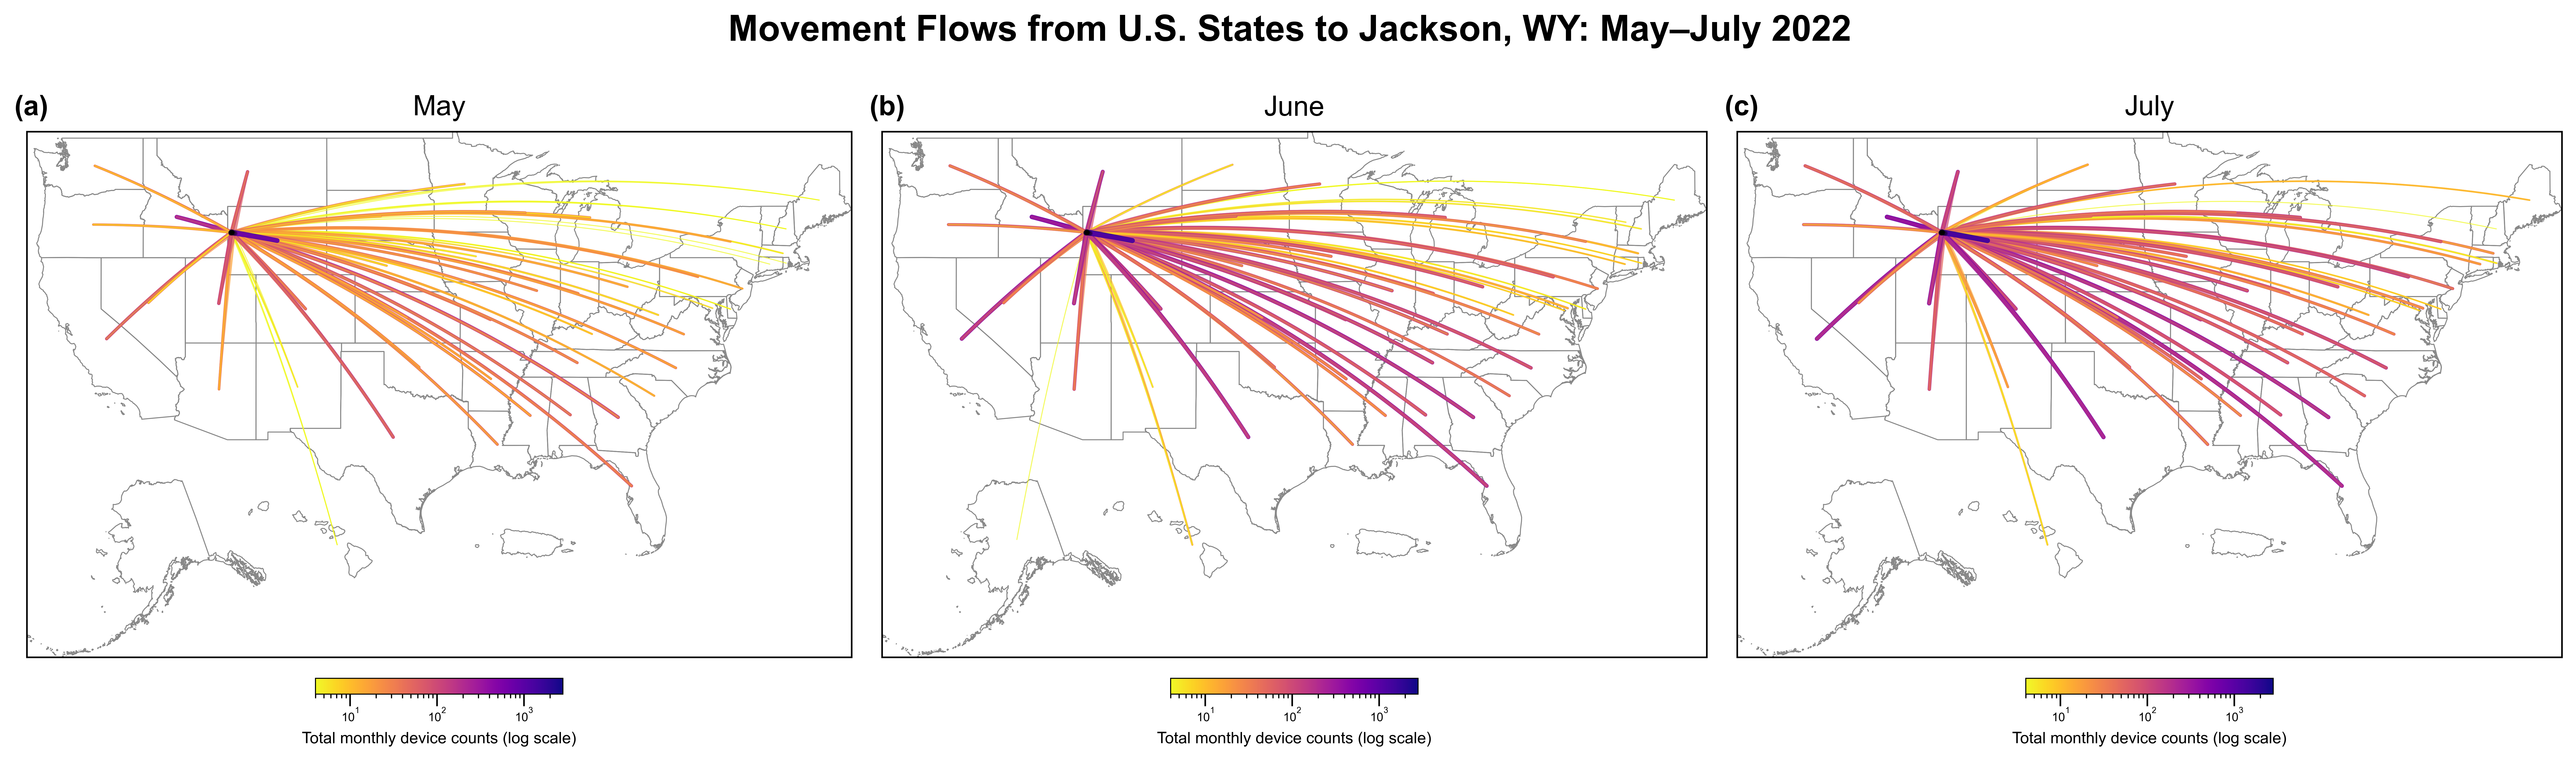

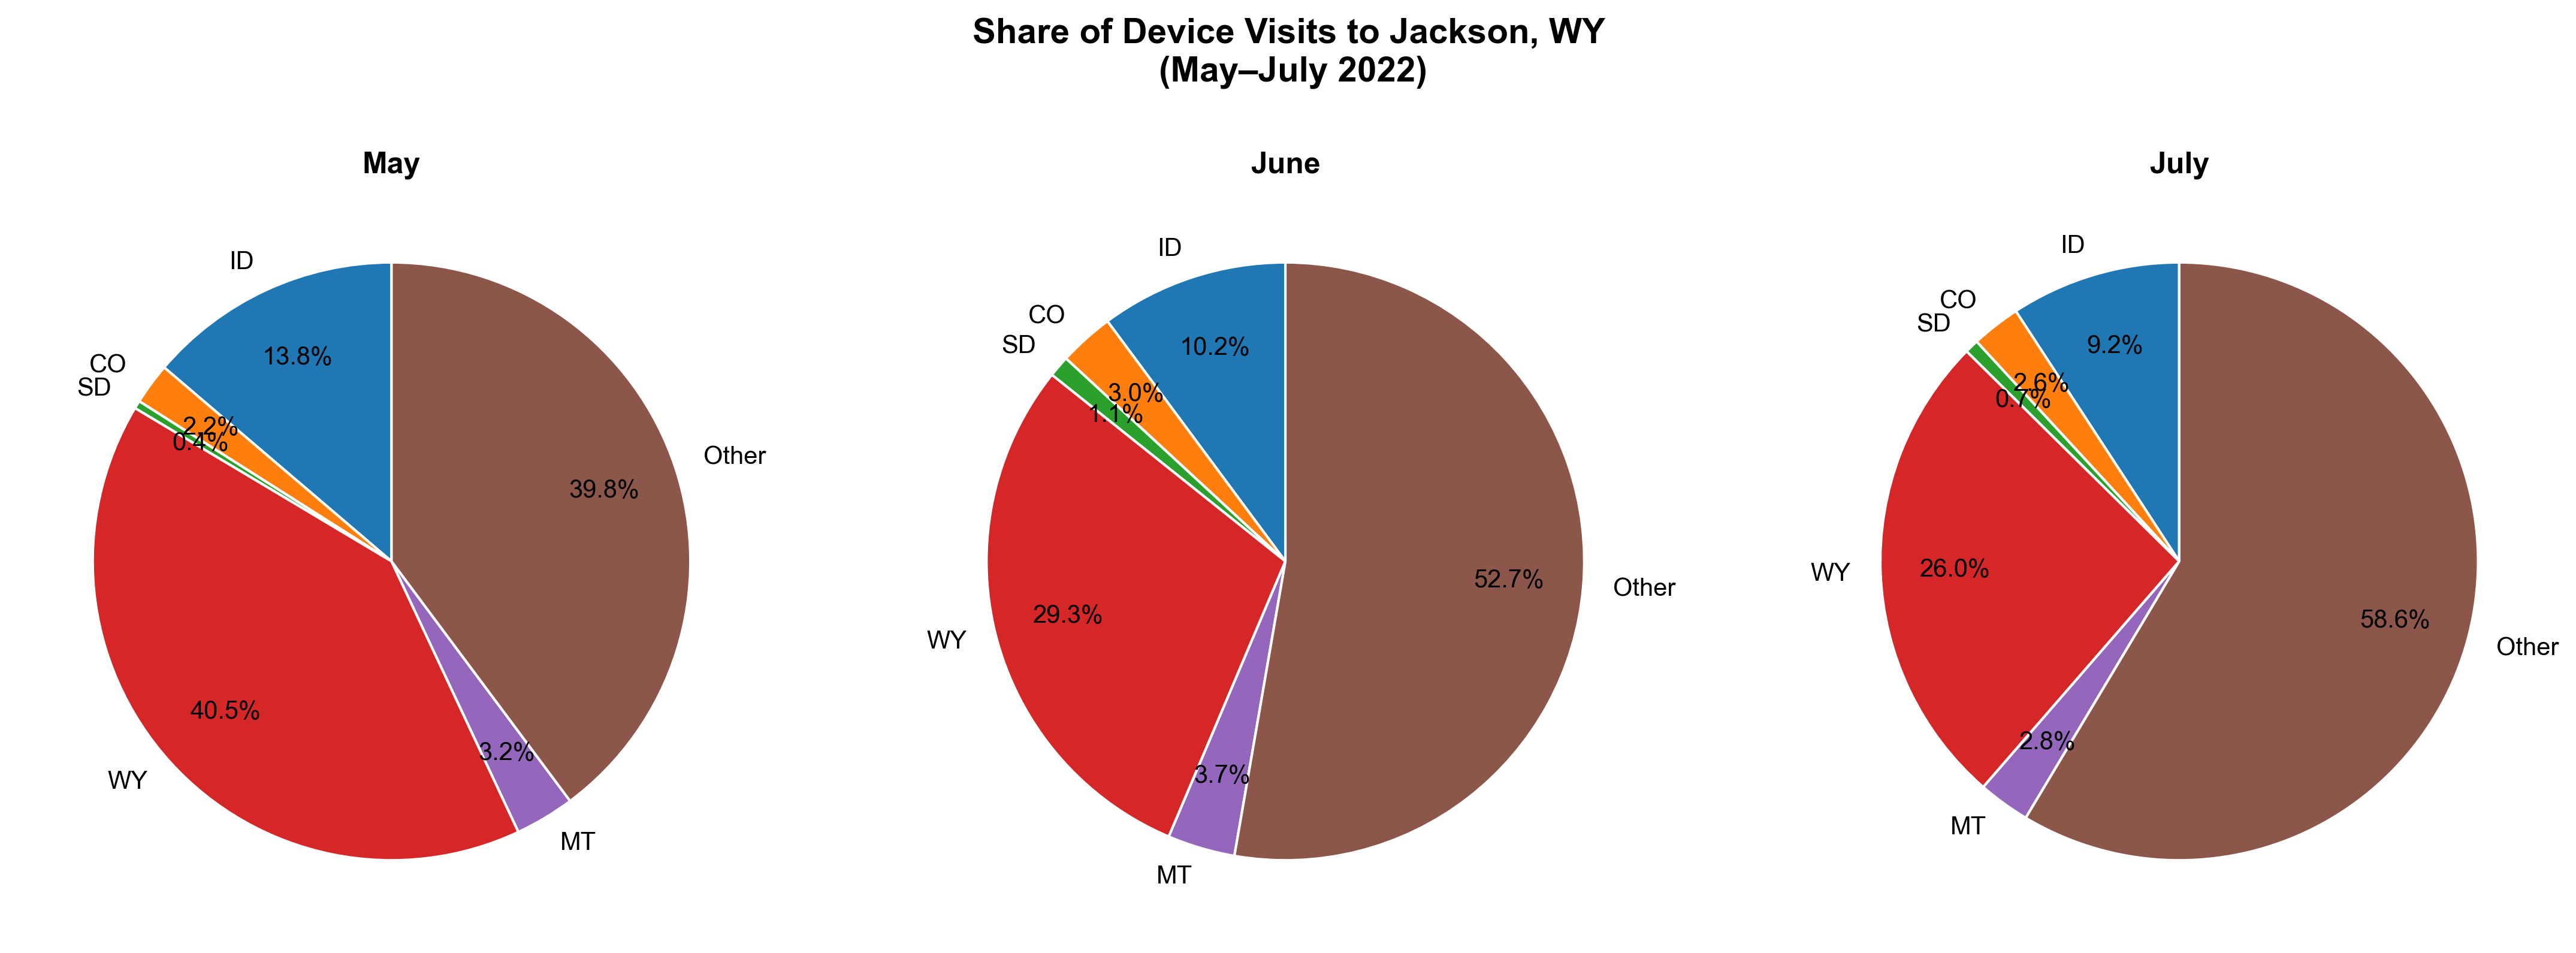

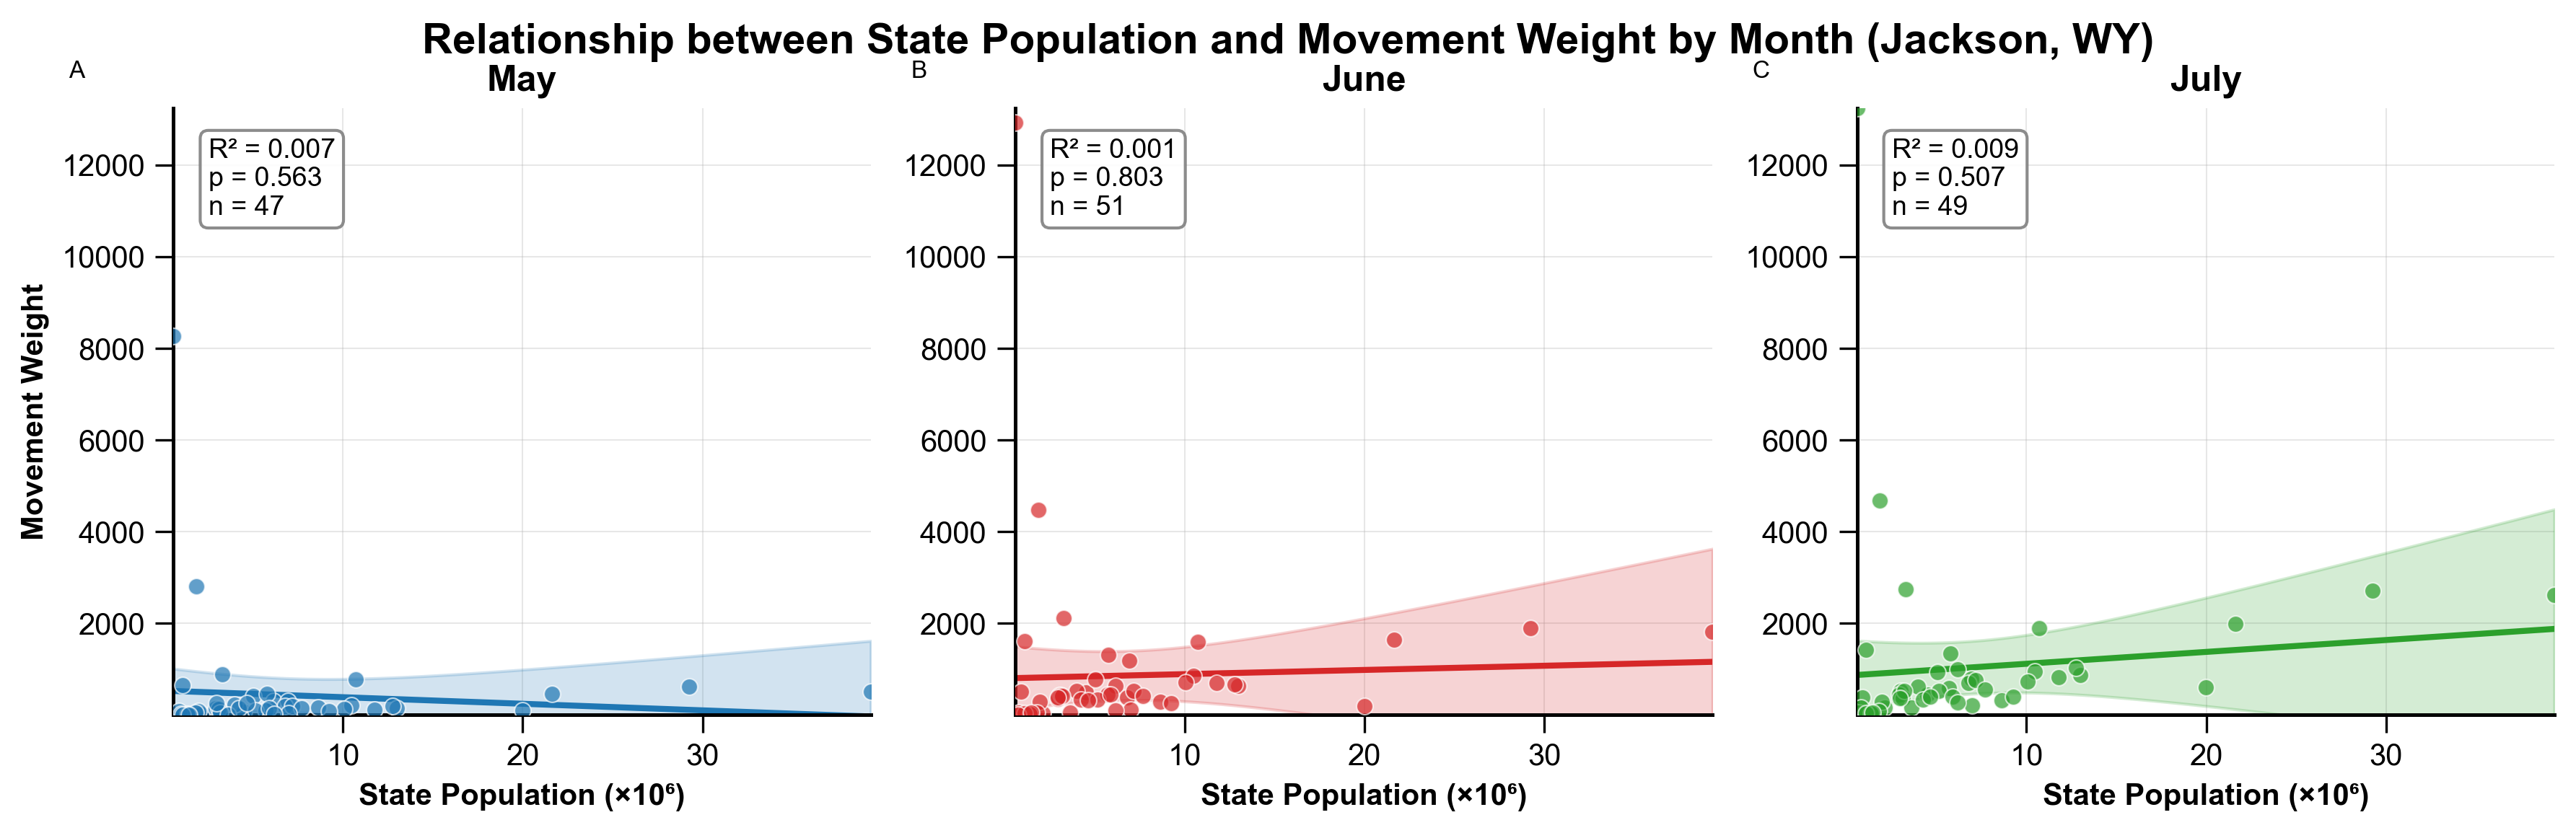

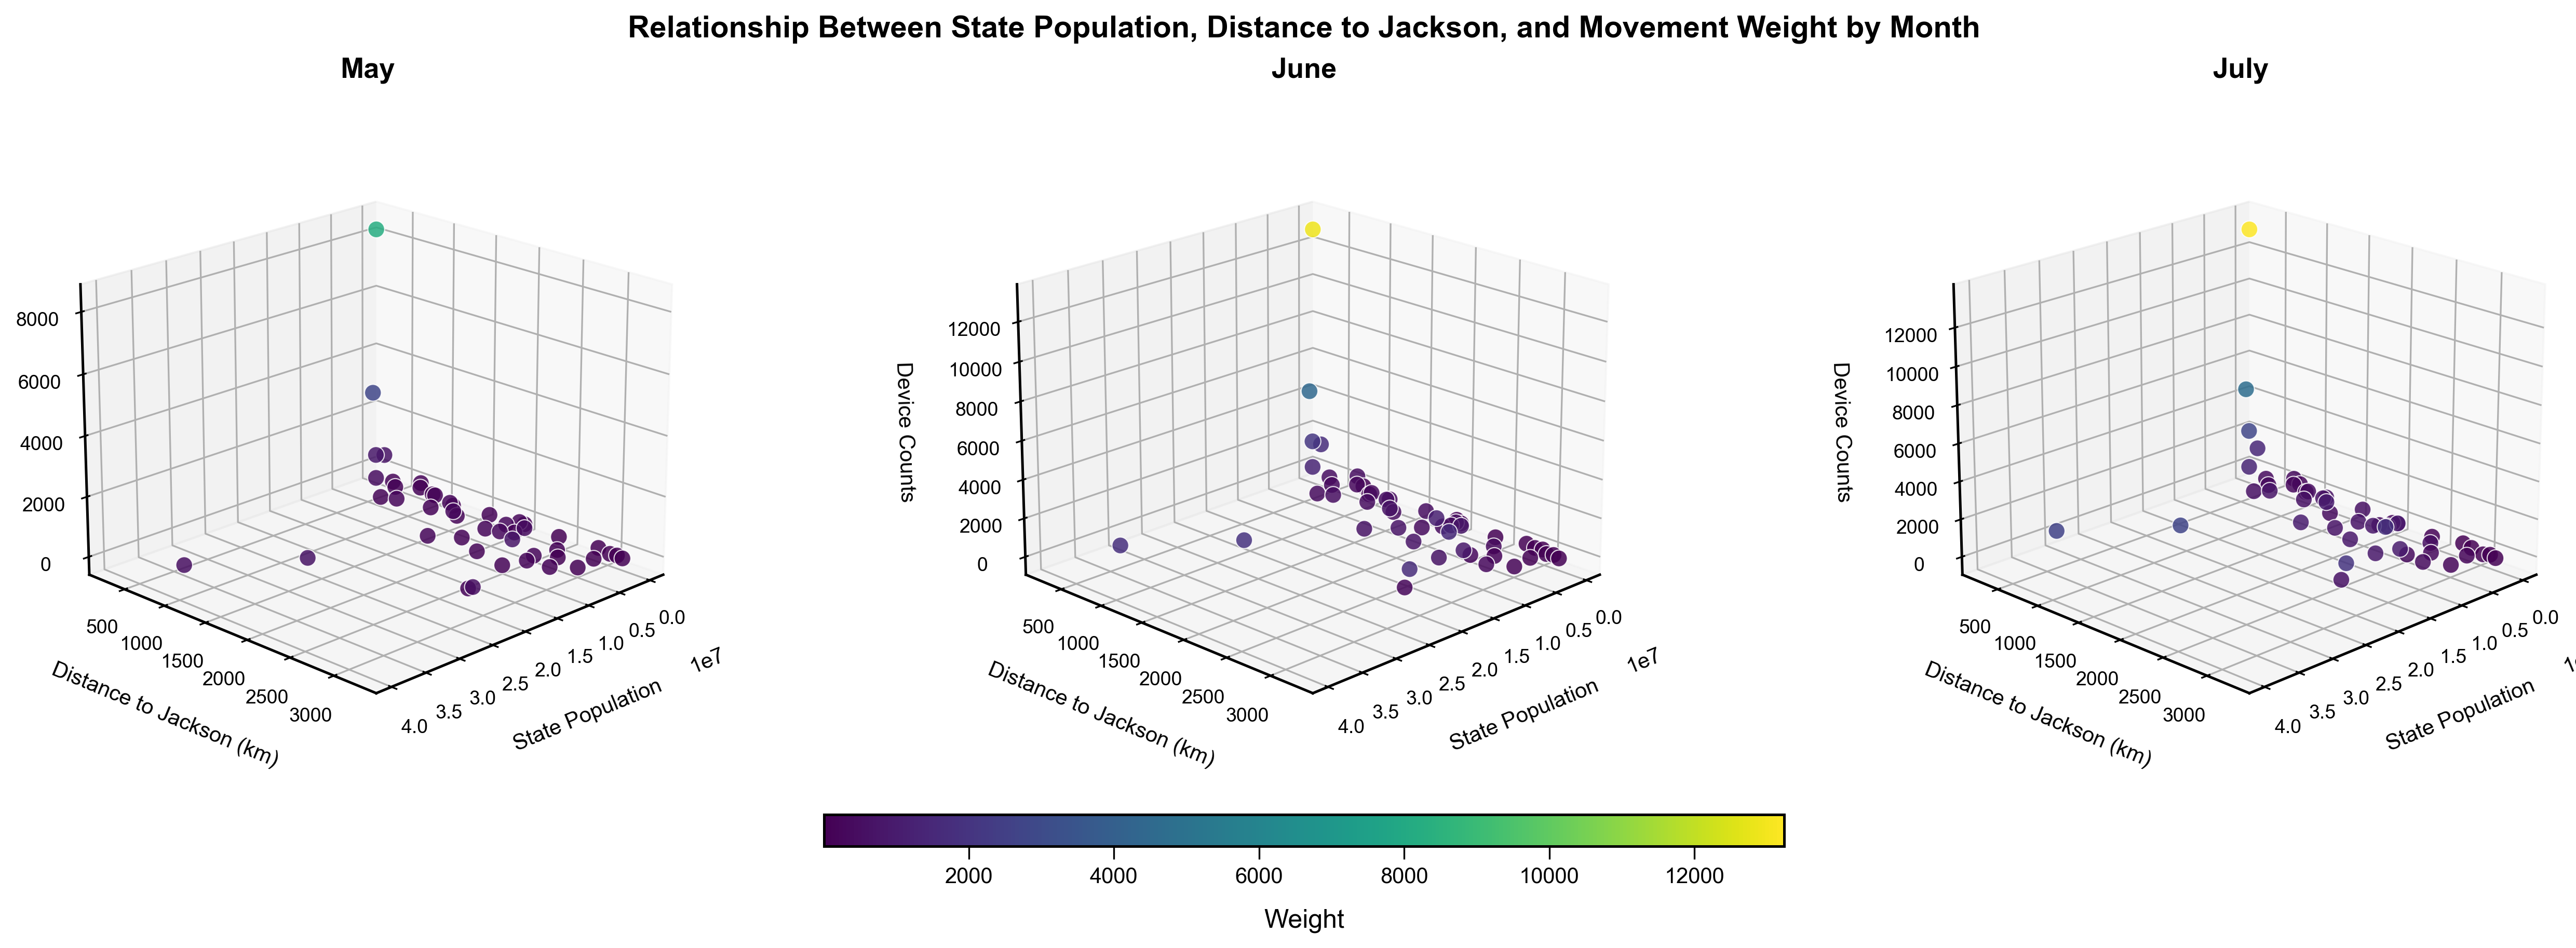

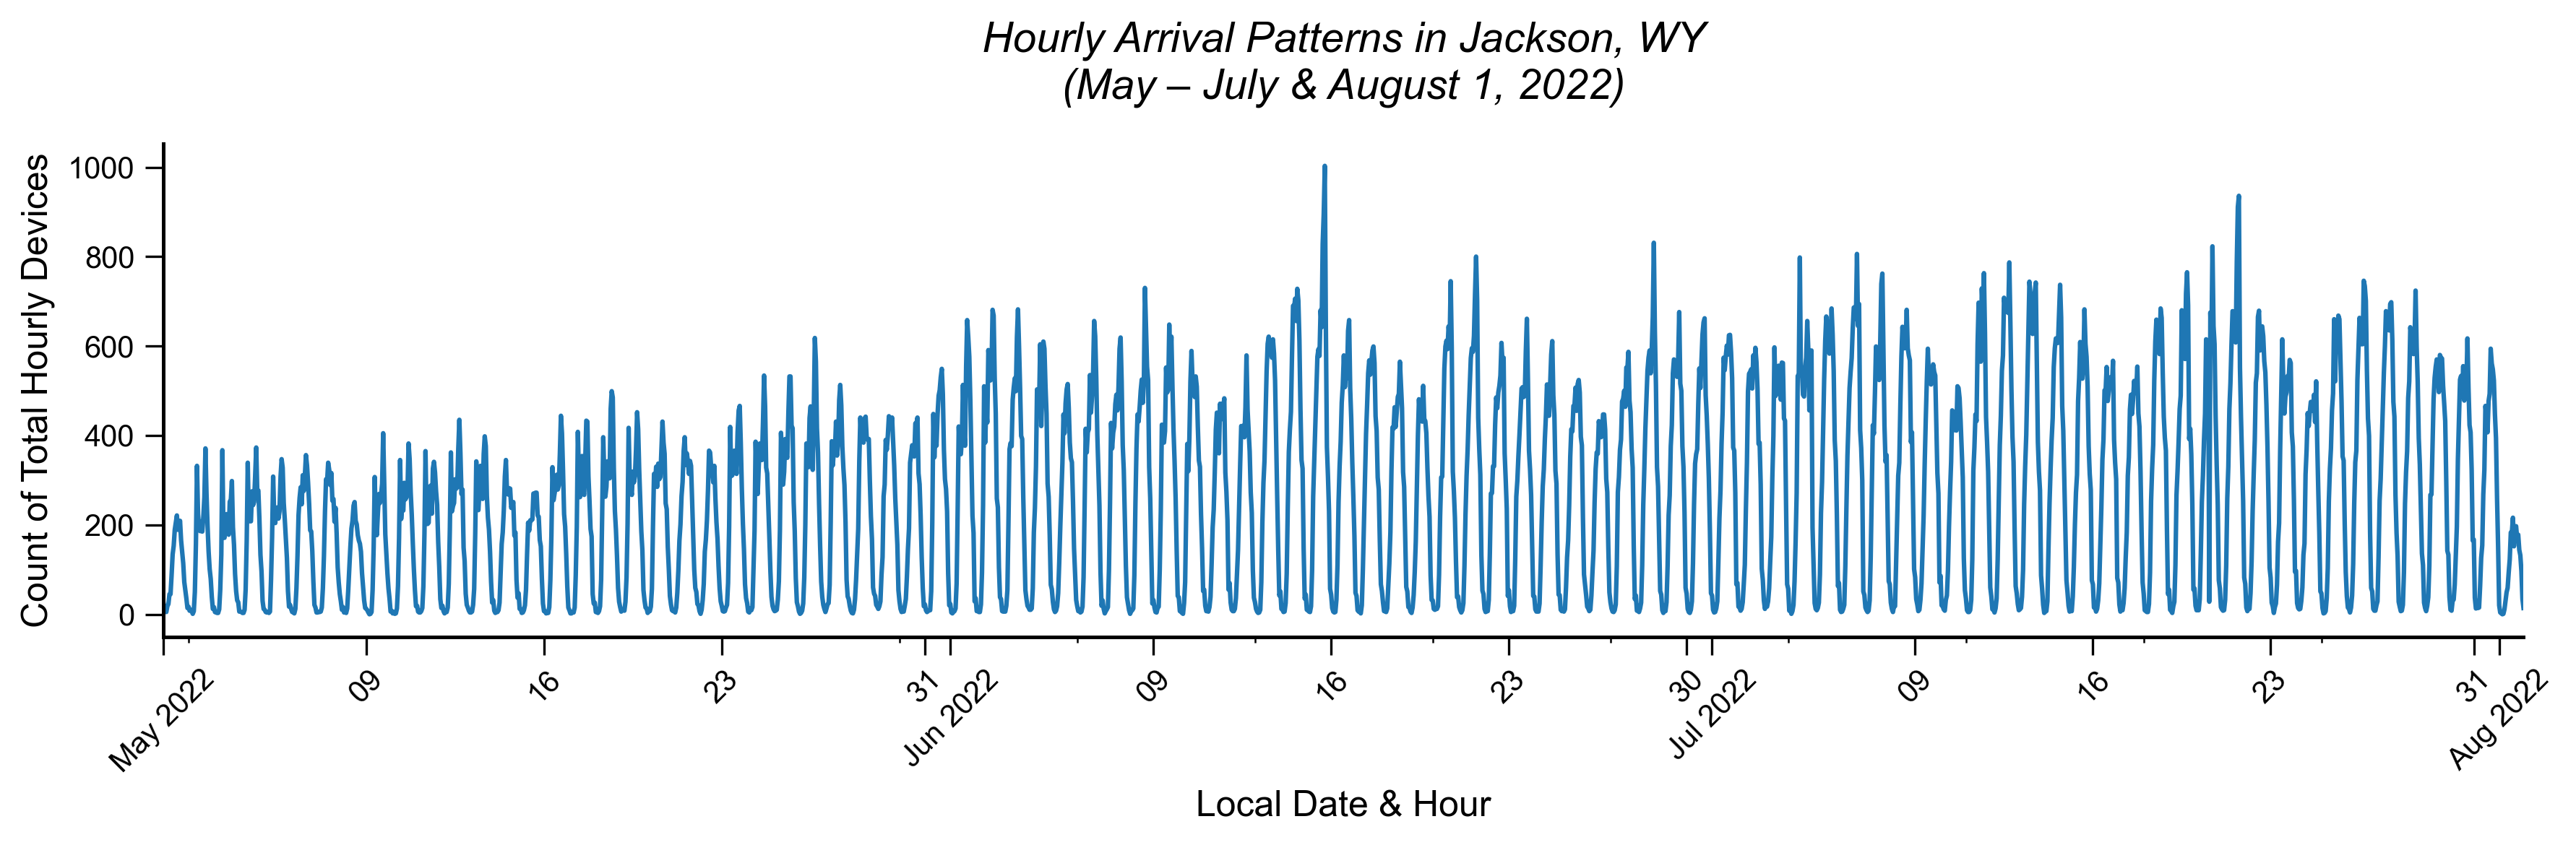

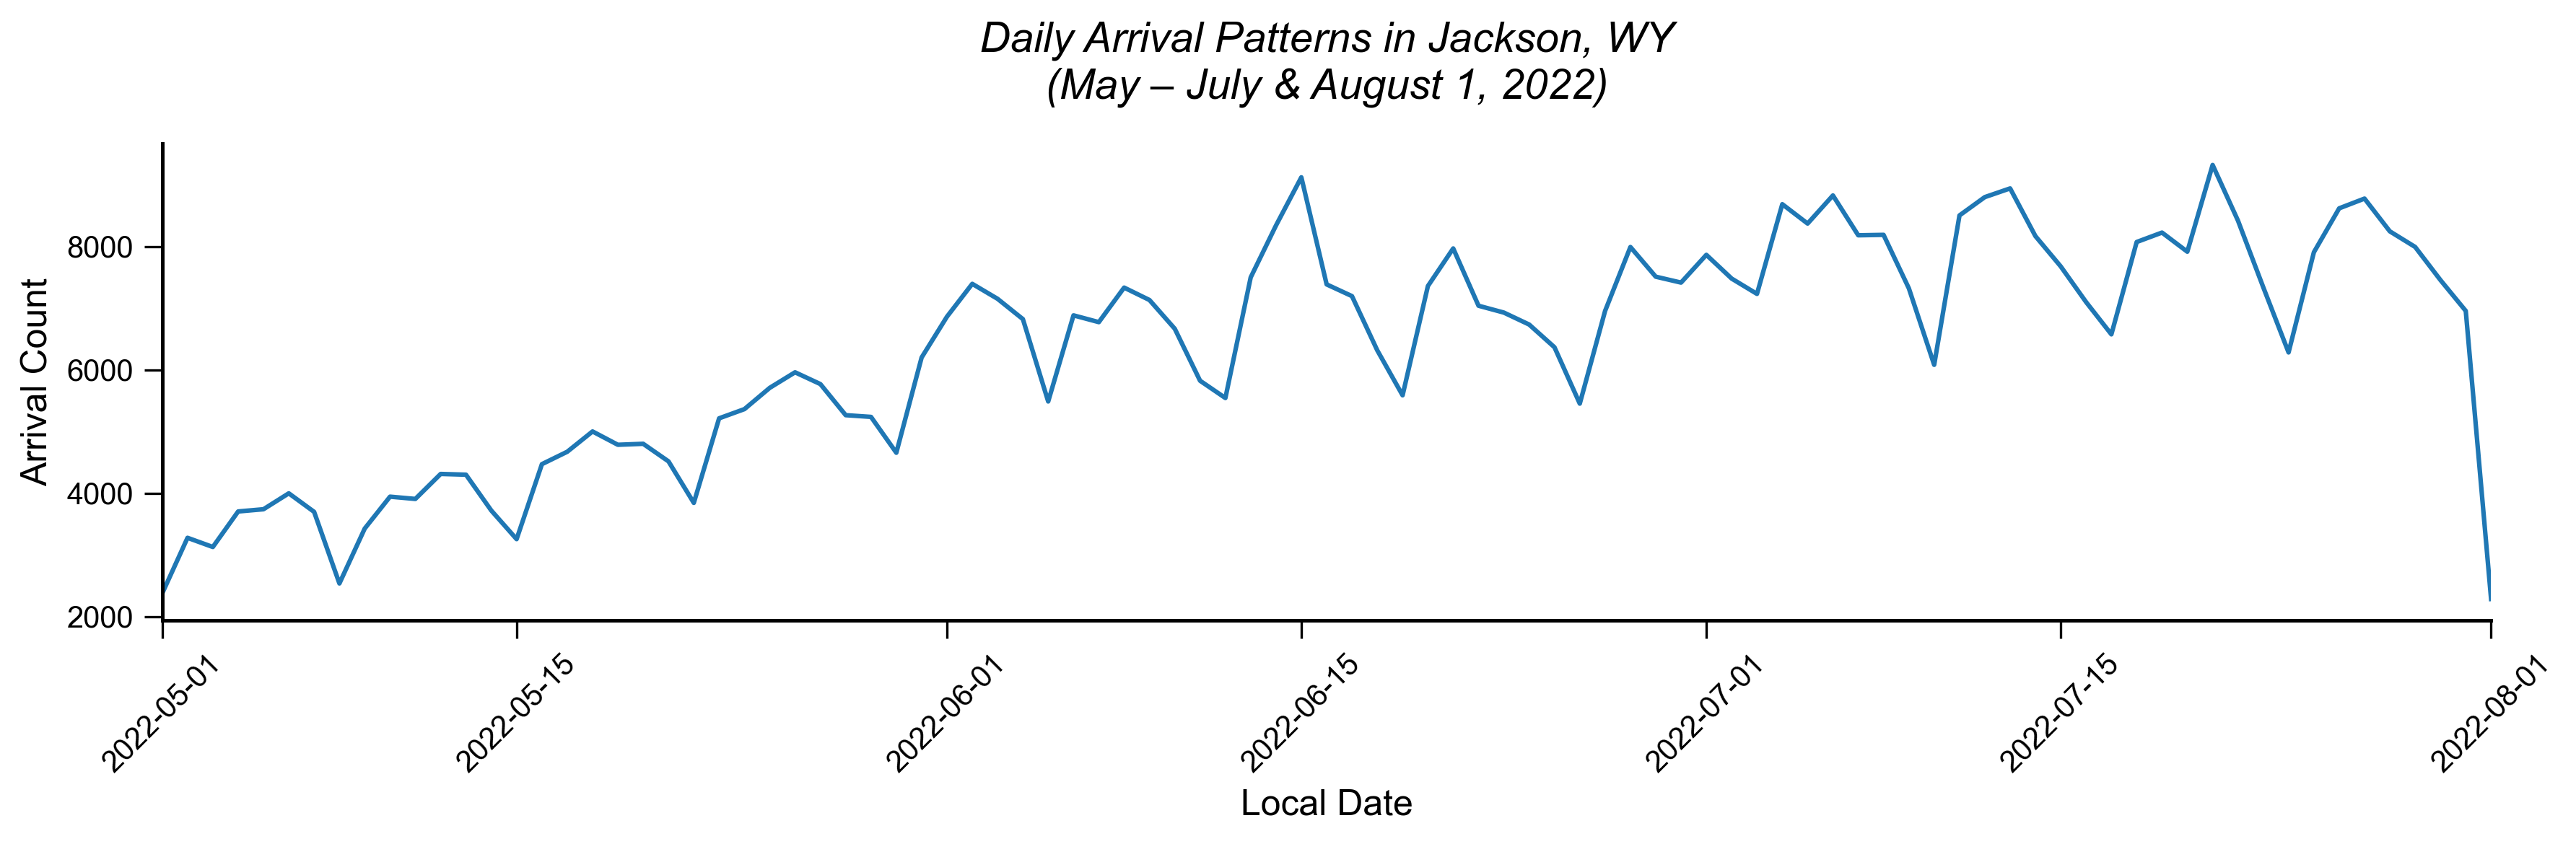

<Figure size 1920x1440 with 0 Axes>

<Figure size 1920x1440 with 0 Axes>

<Figure size 1920x1440 with 0 Axes>

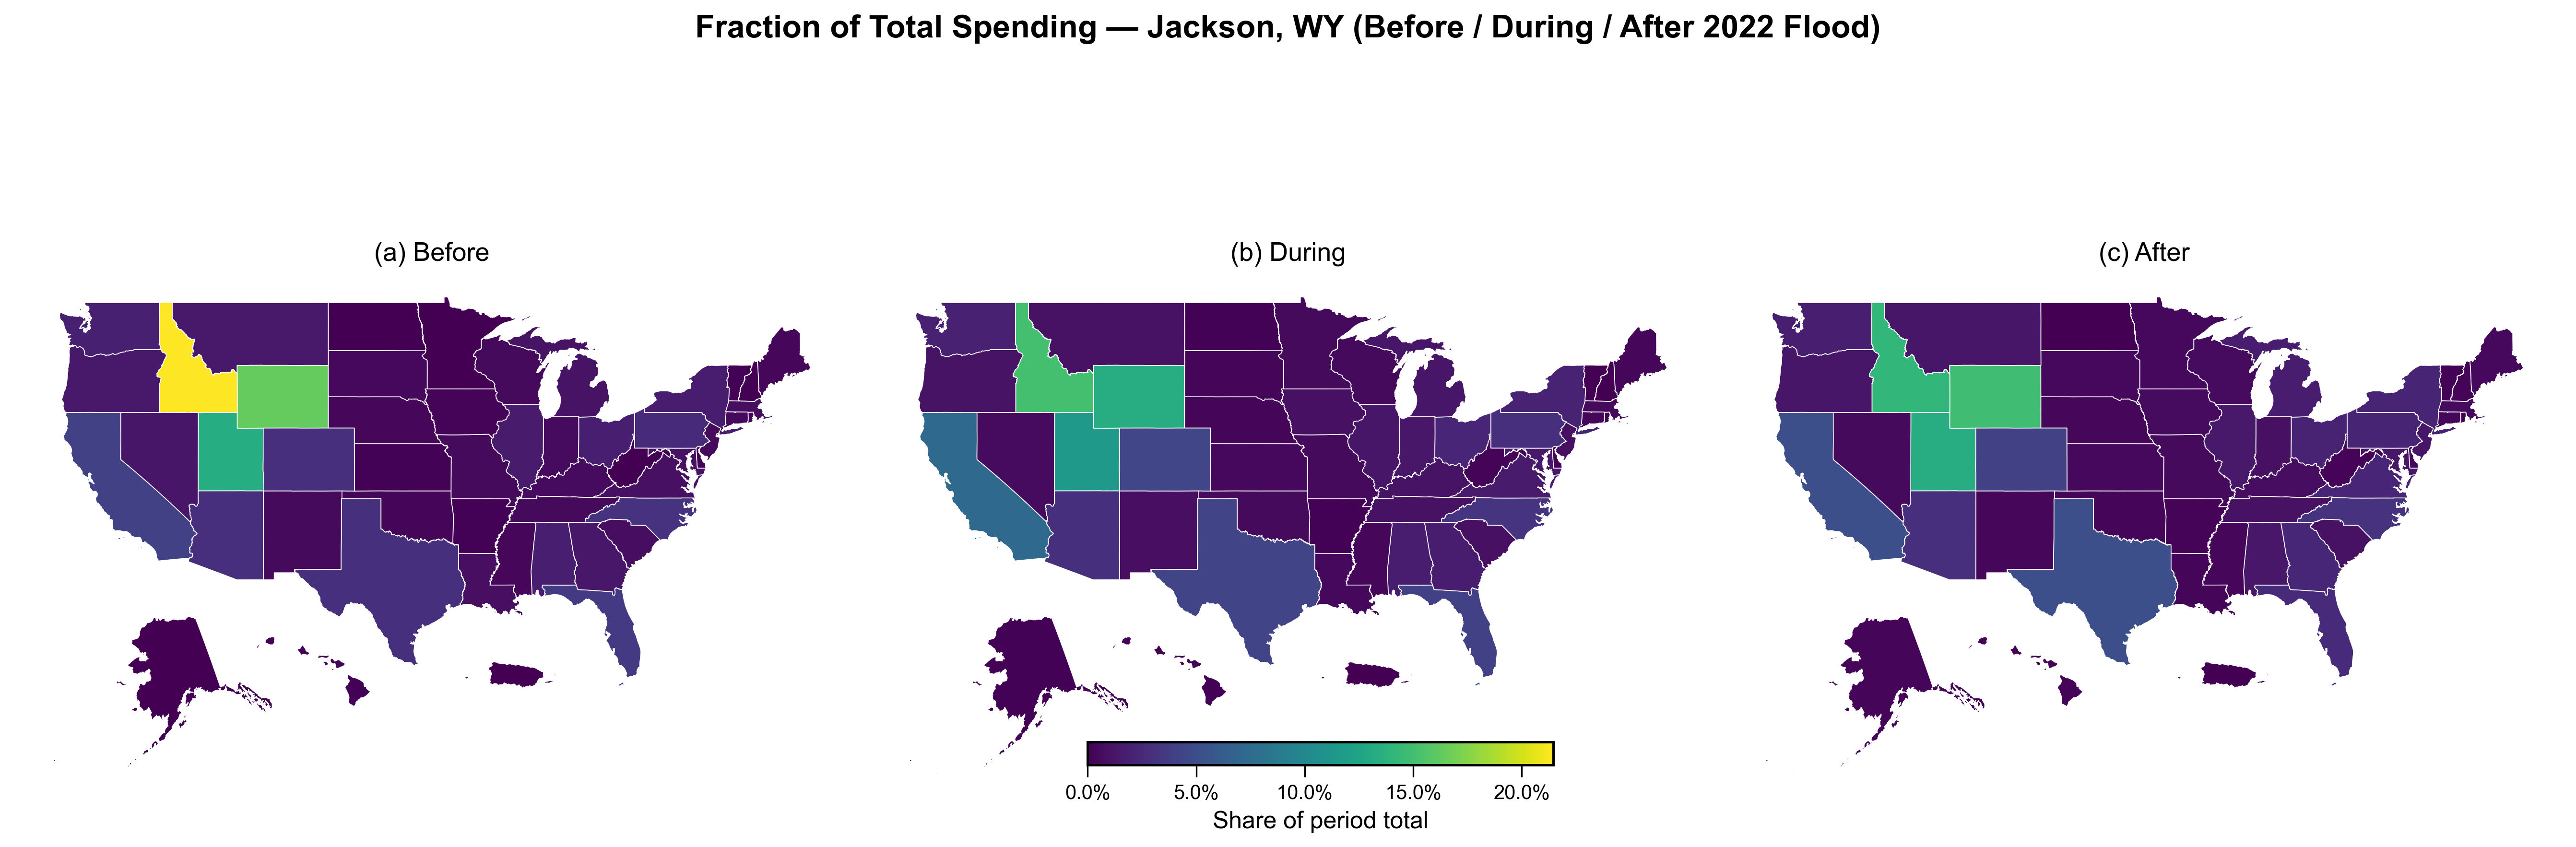

In [6]:
import sys
import geopandas as gpd
import matplotlib.pyplot as plt
import gc

# PATHS
sys.path.append(r"F:\Yellow Stone Flood-2022\floodanalysis\Scripts")
import mo as mb

# LOAD LARGE INPUTS
wy_mt_cbg = mb.load_blockgroups([mb.SHAPEFILE_WY_CBG, mb.SHAPEFILE_MT_CBG])
df_2022 = mb.load_advan([mb.ADVAN_CSV_WY, mb.ADVAN_CSV_MT], year=2022)
gdf_proj_states = mb.load_state_pop(mb.STATE_POP_FILE)

# Disable plt.show() only DURING pipeline execution 
_real_show = plt.show
plt.show = lambda *args, **kwargs: None

results = mb.run_full_pipeline_for_place(
    place_name="Jackson, Wyoming, USA",
    pretty_label="Jackson, WY",
    geoid_prefixes=["56039"],
    wy_cbg=wy_mt_cbg,
    df_2022=df_2022,
    gdf_proj_states=gdf_proj_states,
    exclude_geoids=None,
    outdir="temp"
)

# Delete unwanted figures
if "figs" in results:
    # Block the county-level flow map
    if "county_flow" in results["figs"]:
        plt.close(results["figs"]["county_flow"])


# Restore plt.show() 
plt.show = _real_show

# Hourly plots
hourly_fig, _ = mb.plot_hourly_series(results["hourly_series"], "Jackson, WY")
plt.show()
plt.close(hourly_fig)

# Daily plots
daily_fig, _ = mb.plot_daily_series(results["daily_series"], "Jackson, WY")
plt.show()
plt.close(daily_fig)

# State to POI flow Map
if "state_flow" in results["figs"]:
    fig_state = results["figs"]["state_flow"]
    plt.figure(fig_state.number)
    plt.show()
    plt.close(fig_state)

# Regression Plot
if "regression" in results["figs"]:
    fig_reg = results["figs"]["regression"]
    plt.figure(fig_reg.number)
    plt.show()
    plt.close(fig_reg)

# 3D scatter Plots
if "scatter3d" in results["figs"]:
    fig_3d = results["figs"]["scatter3d"]
    plt.figure(fig_3d.number)
    plt.show()
    plt.close(fig_3d)

# Choropleth maps
us_states = gpd.read_file(mb.US_STATES_FILE).to_crs(epsg=4326)
us_states["STATEFP"] = us_states["STATEFP"].astype(str).str.zfill(2)
us_states = us_states[~us_states["STATEFP"].isin(["60", "66", "69", "78"])].copy()

result_origin = mb.analyze_state_origin_for_place(
    csv_path=r"F:\Yellow Stone Flood-2022\floodanalysis\Data\CSV Origin\Jackson_State_of_Origin.csv",
    us_states_gdf=us_states,
    place_label="Jackson, WY",
    as_fraction=True,
    save_fig_path=None,
    save_processed_csv=False
)
plt.show()
plt.close(result_origin["fig"])
